# INFORMAÇÕES IMPORTANTES:

# Utilização de rede neural recorrente LSTM para previsões intradiárias do mercado de ações. 

## Base de Dados:

In [1]:
import pandas as pd
#-----------------------------------------------------------
#Testes com base da ação de 2019(antes da pandemia) e Base da ação de 2021(durante a pandemia)
#-----------------------------------------------------------

'''BAIXAR DAS 3 AÇÕES, DE 30 MINUTOS, DE 2019 E 2021'''

#-----------------------------------------------------------
#Lendo o arquivo em csv
#-----------------------------------------------------------
df = pd.read_csv('/home/bene/MachineLearning/TCC/Base de Dados/BPAC_30m_2019.csv') 
#df = pd.read_csv('/home/bene/MachineLearning/TCC/Base de Dados/dados_teste.csv') 
df.head()

#print(df)
#df.info()

,time,open,high,low,close,Volume
0,2019-01-02T10:00:00-02:00,5.9125,5.9375,5.9125,5.9300,7600
1,2019-01-02T10:30:00-02:00,5.9300,5.9700,5.9200,5.9525,46800
2,2019-01-02T11:00:00-02:00,5.9575,5.9925,5.9400,5.9800,52800
3,2019-01-02T11:30:00-02:00,5.9875,6005.0000,5.9825,5.9900,57200
4,2019-01-02T12:00:00-02:00,5995.0000,6035.0000,5.9900,6.0175,60400


In [2]:
#-----------------------------------------------------------
#Para mudar o index, utilizei a fonte abaixo
# Fonte: https://www.delftstack.com/pt/howto/python-pandas/pandas-remove-index/#remover-%25C3%25ADndice-de-um-pandas-dataframe-utilizando-o-m%25C3%25A9todo-set_index
#-----------------------------------------------------------

df = df.set_index('time') #Mudando o index para o date
#print(df.index)

#-----------------------------------------------------------
#Sabe se mudou o index, porque com o df.info, ele não aparece como um dos parametros
#-----------------------------------------------------------
df.info()

#print(df)


<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 2019-01-02T10:00:00-02:00 to 2019-12-30T17:30:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3917 non-null   float64
 1   high    3917 non-null   float64
 2   low     3917 non-null   float64
 3   close   3917 non-null   float64
 4   Volume  3917 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 183.6+ KB


## Gráficos:

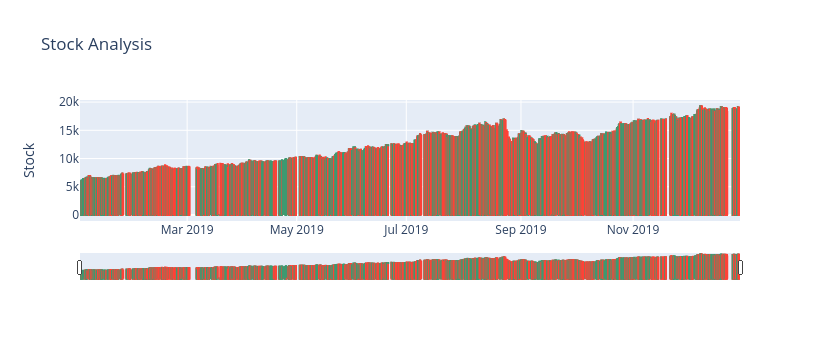

In [4]:
#-----------------------------------------------------------
#Transformando os dados em candlestick para melhorar a vizualização
#Fonte: https://python.plainenglish.io/a-simple-guide-to-plotly-for-plotting-financial-chart-54986c996682
#-----------------------------------------------------------

'''TENTAR COM UMA BASE MENOR '''
''' Talvez tenha ficado dessa maneira por ter muitos dados'''
import plotly.graph_objects as go
fig = go.Figure(go.Candlestick(x=df.index,
  open=df['open'],
  high=df['high'],
  low=df['low'],
  close=df['close']))


fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[15.5, 10], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
        ]
)

fig.update_layout(
        title='Stock Analysis',
        yaxis_title='Stock'
)

fig.show()

#https://stackoverflow.com/questions/63780293/python-plotly-how-to-remove-datetime-gaps-in-candle-stick-chart
#https://plotly.com/python/ohlc-charts/

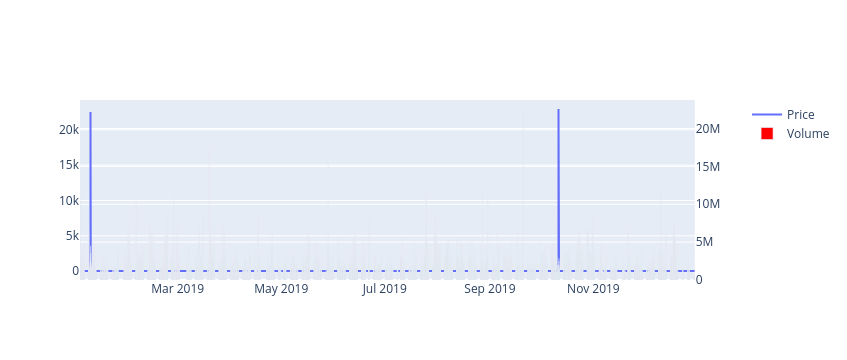

' Uma base de dados muito grande para o gráfico'

In [4]:
#-----------------------------------------------------------
# Gráfico de linha, na B3 contem  somente os preços de fechamento
# Fonte: https://pythoninoffice.com/draw-stock-chart-with-python/
#-----------------------------------------------------------

import plotly.graph_objects as go

#-----------------------------------------------------------
# Somente linhas
#-----------------------------------------------------------
#fig = go.Figure(data=go.Scatter(x=df.index,y=df['close'], mode='lines'))
#fig.show()

#-----------------------------------------------------------
# Somente linhas e pontos
#-----------------------------------------------------------
#fig = go.Figure(data=go.Scatter(x=df.index,y=df['close'], mode='lines+markers'))
#fig.show()


from plotly.subplots import make_subplots
#-----------------------------------------------------------
# Neste momento, as barras de volume têm todas a mesma cor. 
#Podemos usar cores diferentes para distinguir entre um dia de alta ou de 
#baixa – verde para dias de alta e vermelho para dias de baixa.
#Para fazer isso, basta calcular a mudança diária (positiva ou negativa) 
#e inserir uma coluna de cores em nosso dataframe
#-----------------------------------------------------------
df['diff'] = df['close'] - df['open']
df.loc[df['diff']>=0, 'color'] = 'green'
df.loc[df['diff']<0, 'color'] = 'red'

fig = make_subplots(specs=[[{"secondary_y": True}]])

#-----------------------------------------------------------
# Apesar do preço de fechamento do ativo ser o item mais avaliado, 
# o gráfico de linhas também permite visualizar valores de abertura, 
# mínimas ou máximas de forma separada.
#-----------------------------------------------------------

#-----------------------------------------------------------
# O gráfico de linhas
#-----------------------------------------------------------
fig.add_trace(go.Scatter(x=df.index,y=df['close'],name='Price'),secondary_y=False)

#-----------------------------------------------------------
# O gráfico de barras
#-----------------------------------------------------------
fig.add_trace(go.Bar(x=df.index,y=df['Volume'],name='Volume', marker={'color':df['color']}),secondary_y=True)
fig.show()


''' UTILIZAR OUTRO GRÁFICO'''
''' Uma base de dados muito grande para o gráfico'''

## Pré-processamento de dados:

In [ ]:
#-----------------------------------------------------------
#1º Passo: Retirar valores nulos
#-----------------------------------------------------------

'''Valores nulos podem ser só considerados valores NaN ou valor 0?
Um valor 0 poderia causar problema para a previsão? '''
# https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados
#Quando o conjunto de dados é grande, podemos contar o número de valores ausentes.
df.isnull().sum()
#print(df)

#https://medium.com/codex/simple-moving-average-and-exponentially-weighted-moving-average-with-pandas-57d4a457d363
#https://www.statology.org/exponential-moving-average-pandas/
#https://towardsdatascience.com/time-series-from-scratch-exponentially-weighted-moving-averages-ewma-theory-and-implementation-607661d574fe



In [ ]:
#-----------------------------------------------------------
#2º Passo: Suavização da base (valores ruidosos) 
#-----------------------------------------------------------

#https://medium.com/codex/simple-moving-average-and-exponentially-weighted-moving-average-with-pandas-57d4a457d363
#https://www.statology.org/exponential-moving-average-pandas/
#https://towardsdatascience.com/time-series-from-scratch-exponentially-weighted-moving-averages-ewma-theory-and-implementation-607661d574fe
